# In this Notebook:
- We define global setting for plotting with Seaborn with a custom color palette
containing the colors to be same as our presentation layout
- Plot target distribution in the data


## Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## Global Plot Settings (sns)

In [2]:
# set seaborn options globally
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
custom_params = {"axes.facecolor": "#f2f1ec", 
"figure.facecolor": "#f2f1ec",
'figure.titleweight': 'bold',
'figure.titlesize': 28,#'large',
'grid.alpha': 1.0,
'font.size': 16.0,
'font.weight': 'bold',
'axes.labelsize': 16,
'axes.labelcolor': '#365b6d',
'axes.titlepad': 10.0,
'axes.titlesize': 'large',
'xtick.labelsize': 16,
'xtick.color': '#365b6d',
'xtick.bottom': True,
'ytick.labelsize': 16,
'ytick.color': '#365b6d',
'ytick.left': True,
'text.color' : '#365b6d',
'legend.title_fontsize': 12.0,
'legend.frameon': False,
'axes.linewidth': 3,#0.8,
'axes.spines.left': True,
'axes.spines.bottom': True,
'axes.spines.right': True,
'axes.spines.top': True,
'axes.edgecolor': '#365b6d',
'axes.labelweight': 'bold',
'axes.titleweight': 'bold',
}
sns.set_theme(style="white", palette=colors, rc=custom_params)

# custom color palette (color codes taken from our Canva presentation layout): 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
custom_palette = sns.set_palette(sns.color_palette(colors))
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white

# display color palette
sns.color_palette()

[(0.21176470588235294, 0.3568627450980392, 0.42745098039215684),
 (0.2549019607843137, 0.7568627450980392, 0.7294117647058823),
 (0.1568627450980392, 0.615686274509804, 0.8235294117647058),
 (0.4235294117647059, 0.5725490196078431, 0.5254901960784314),
 (0.9490196078431372, 0.9450980392156862, 0.9254901960784314),
 (0.9803921568627451, 0.6, 0.2235294117647059)]

## Read in Data

In [4]:
df_eda = pd.read_csv('../data/petfinder-adoption-prediction/df_eda.csv')


## Target Distribution: Adoption Speed

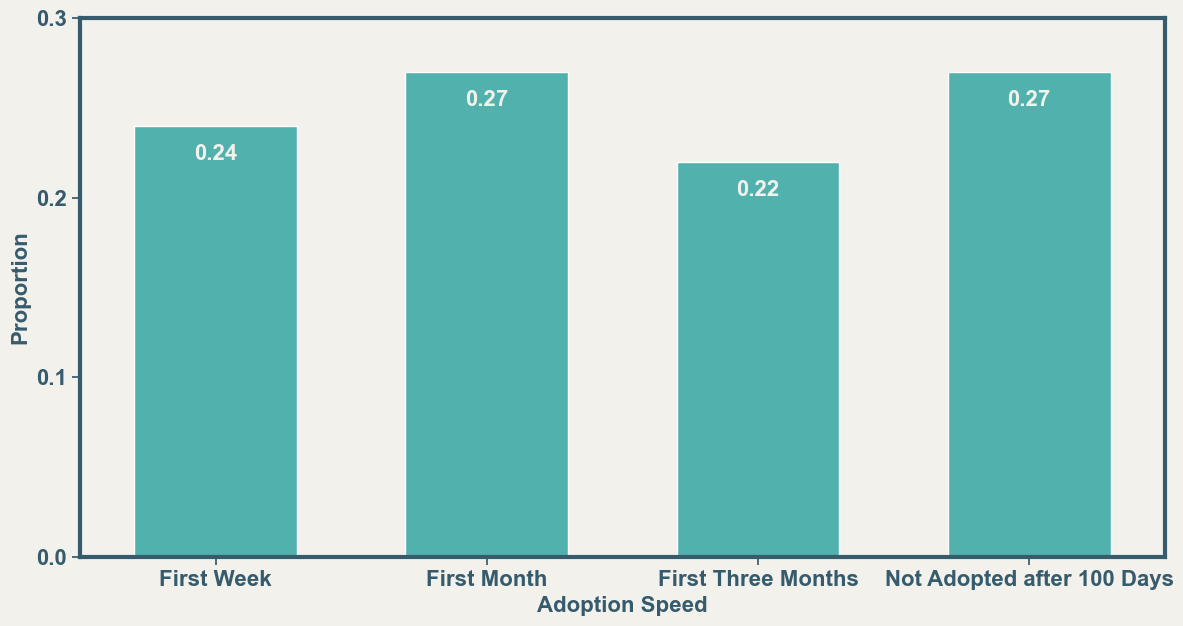

In [6]:
# list of actual value count (for alternative plot we did not use in presentation)
#adoptionspeed_values = df_eda['adoptionspeed'].value_counts(normalize=False).sort_index().to_list()

# list of proportional value counts (as shown in presentation)
adoptionspeed_list = df_eda['adoptionspeed'].value_counts(normalize=True).round(2).sort_index().to_list()


# Adoptionspeed frequency table
adoptionspeed = df_eda['adoptionspeed'].value_counts(normalize=True).round(2)

fig = plt.figure(figsize=(14, 7))
adoption_plot = sns.barplot(x=adoptionspeed.index, y=adoptionspeed.values, color='#41c1ba', width=0.6)
plt.xlabel("Adoption Speed")
plt.ylabel("Proportion")

custom_x_ticks = [0,1,2,3] 
custom_x_tick_labels = ['First Week', 'First Month', 'First Three Months', 'Not Adopted after 100 Days']
plt.xticks(custom_x_ticks, custom_x_tick_labels)

i = 0
for g in adoption_plot.patches:
    adoption_plot.annotate(adoptionspeed_list[i],
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, -20),
                   textcoords = 'offset points',
                   color = '#f2f1ec')
    i += 1
plt.yticks(ticks=np.linspace(0,0.3,4))

plt.savefig('../images/adoptionspeed_proportional.jpg', dpi=1200)
plt.show();